In [33]:
import torch
from vig import vig_ti_224_gelu, vig_s_224_gelu, vig_b_224_gelu  # Import all model sizes vig_ti_224_gelu

# Choose the correct model size based on your requirements
# For example, to load the smallest model, you can use pvig_ti_224_gelu
# Replace 'your_pretrained_model_path.pth' with the path to your model weights
model_weights_path = 'vig_ti_74.5.pth'

# Initialize the model, here we are using pvig_ti_224_gelu for illustration
# You should replace it with the appropriate function call based on the size you want
model = vig_ti_224_gelu(num_classes=1000)  # Set the number of classes to what you need

# Load the pretrained weights
model.load_state_dict(torch.load(model_weights_path,map_location=torch.device('cpu')), strict=False)

# Move the model to GPU if available for faster computation
model = model.cuda() if torch.cuda.is_available() else model

# Set the model to evaluation mode
model.eval()

dpr [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
num_knn [9, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 18]


DeepGCN(
  (stem): Stem(
    (convs): Sequential(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GELU(approximate='none')
      (3): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): GELU(approximate='none')
      (6): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (7): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): GELU(approximate='none')
      (9): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (10): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): GELU(approximate='none')
      (12): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): BatchNorm2d(192, eps=1e-05, momentum=0.

In [278]:
import torch
from PIL import Image
from timm.data.transforms_factory import create_transform
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

print(IMAGENET_DEFAULT_MEAN)
print(IMAGENET_DEFAULT_STD)

def preprocess_image(image_path, input_size=(224, 224), mean=(0.485, 0.456, 0.406, 0.0), std=(0.229, 0.224, 0.225, 1.0)):
    # Load the image
    image = Image.open(image_path).convert('RGBA')
    
    # Define the transformation
    transform = create_transform(
        input_size=input_size,
        is_training=False,
        use_prefetcher=False,
        no_aug=False,
        interpolation='bilinear',
        mean=mean,
        std=std,
        crop_pct=None,
        tf_preprocessing=False,
    )
    
    # Apply the transformations to the image
    tensor_image = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Move the tensor to the GPU if available
    tensor_image = tensor_image.cuda() if torch.cuda.is_available() else tensor_image
    
    return tensor_image

preprocessed_image = preprocess_image('test.png')


(0.485, 0.456, 0.406)
(0.229, 0.224, 0.225)


In [ ]:
# from PIL import Image

# import torch

# import matplotlib.pyplot as plt 

# def cut_into_tiles_tensor(image_tensor, num_tiles=4):
#     """
#     Cut the square image tensor into num_tiles pieces (default is 4 for a 2x2 grid).
#     Returns a dictionary of tensor slices representing each tile with their position as keys.
#     """
#     if num_tiles != 4:
#         raise ValueError("This function currently supports only 4 tiles.")
    
#     # Assuming the image tensor is in C x H x W format
#     H, W = image_tensor.shape
#     tile_height, tile_width = H // 2, W // 2
    
#     tiles = {
#         'tl': image_tensor[:tile_height, :tile_width],
#         'tr': image_tensor[:tile_height, tile_width:],
#         'bl': image_tensor[tile_height:, :tile_width],
#         'br': image_tensor[tile_height:, tile_width:]
#     }
    
#     return tiles



# # square_img = make_square(image_path, output_size)
# tiles = cut_into_tiles_tensor(preprocessed_image[0][0])

# # Display the cropped images
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# positions = [['tl', 'tr'],['bl', 'br']]

# for i in range(2):
#     for j in range(2):
#         axs[i, j].imshow(tiles[positions[i][j]])
#         axs[i, j].axis('off')
#         axs[i, j].set_title(positions[i][j].upper())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


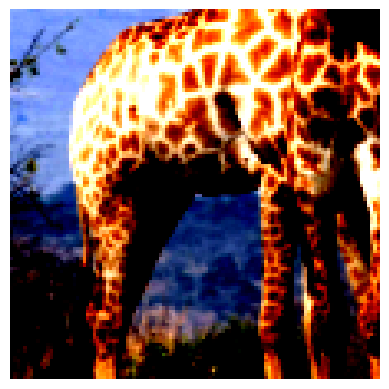

In [373]:
import matplotlib.pyplot as plt

def cut_into_tiles_tensor(image_tensor, num_tiles=4):
    """
    Cut the square image tensor into num_tiles pieces (default is 4 for a 2x2 grid).
    Assumes image tensor is in the format B x C x H x W.
    Returns a dictionary of tensor slices representing each tile with their position as keys.
    """
    if num_tiles != 4:
        raise ValueError("This function currently supports only 4 tiles.")
    
    _, C, H, W = image_tensor.shape  # Adjust to handle the batch and channel dimensions
    tile_height, tile_width = H // 2, W // 2
    
    tiles = {
        'tl': image_tensor[:, :, :tile_height, :tile_width],
        'tr': image_tensor[:, :, :tile_height, tile_width:],
        'bl': image_tensor[:, :, tile_height:, :tile_width],
        'br': image_tensor[:, :, tile_height:, tile_width:]
    }
    
    return tiles


import numpy as np

# Assuming 'preprocessed_image' is your [1, 4, 224, 224] tensor
tiles = cut_into_tiles_tensor(preprocessed_image, 4)

# Visualize the top-left tile by ignoring the batch dimension and assuming RGBA
tile_tl = tiles['bl'].squeeze(0)  # Remove the batch dimension

# Convert tensor to numpy for visualization, ensure it's in [0, 1] if not already
tile_tl_np = tile_tl.numpy().transpose(1, 2, 0)  # Rearrange dimensions to HWC for matplotlib
# Assuming the data is normalized between 0 and 1. If not, you need to normalize or scale it.

fig, ax = plt.subplots()
# If the channels represent RGBA, directly display it
ax.imshow(tile_tl_np)
# If you want to display just the RGB part assuming the 4th channel is alpha
# ax.imshow(tile_tl_np[:, :, :3])  # Ignore the alpha channel
ax.axis('off')
plt.show()


In [374]:
import torch
import random

def create_permuted_images_tensor(tiles, n):
    """
    Create 'n' permuted images out of the 4 tiles for a 4-channel image tensor.
    Assumes tiles are PyTorch tensors in B x C x H x W format.
    Returns a list of permuted tensor images.
    """
    permuted_images = []
    tile_positions = list(tiles.keys())

    for _ in range(n):
        # Shuffle the positions
        random.shuffle(tile_positions)
        # Reconstruct the permuted image tensor by concatenating the shuffled tiles
        # Concatenate along width (W dimension) then height (H dimension)
        # Adjusting for B x C x H x W format
        top_row = torch.cat([tiles[tile_positions[0]], tiles[tile_positions[1]]], dim=3)  # Concatenate along width
        bottom_row = torch.cat([tiles[tile_positions[2]], tiles[tile_positions[3]]], dim=3)  # Concatenate along width
        new_img_tensor = torch.cat([top_row, bottom_row], dim=2)  # Concatenate along height
        
        permuted_images.append(new_img_tensor)
        
    return permuted_images



# Assuming 'tiles' is a dictionary of your 2x2 grid tiles as tensors
# Create 1 permuted image (n=1) for demonstration
permuted_images_tensors = create_permuted_images_tensor(tiles, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


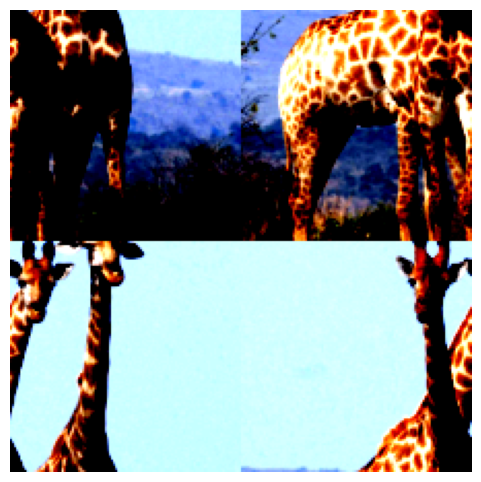

In [375]:
import matplotlib.pyplot as plt

# Function to help with visualizing an RGBA image from a tensor
def visualize_tensor_image(image_tensor):
    # Assuming image_tensor is in B x C x H x W format and C=4
    img_np = image_tensor.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert to H x W x C for visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(img_np)
    plt.axis('off')
    plt.show()

# Visualize the first permuted image
visualize_tensor_image(permuted_images_tensors[0])


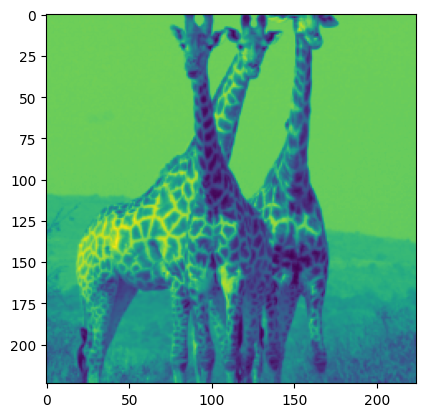

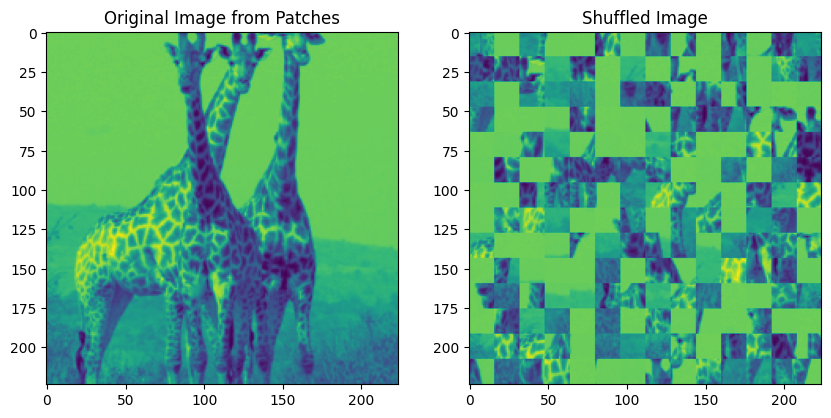

In [342]:
import matplotlib.pyplot as plt
plt.imshow(preprocessed_image[0][1])


import numpy as np
from numpy.random import default_rng  # For reproducible shuffling

def make_patches(image):
    """
    Splits the image into 14x14 patches.

    :param image: Input image of shape (224, 224, Channels).
    :return: Array of shape (256, 14, 14, Channels) containing 14x14 patches.
    """
    patch_size = 16  # Size of each patch
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patches.append(image[i:i+patch_size, j:j+patch_size])
    return np.array(patches)

def shuffle_patches(patches):
    """
    Shuffles the patches randomly.

    :param patches: Array of patches of shape (256, 14, 14, Channels).
    :return: Shuffled array of patches.
    """
    rng = default_rng()  # Initialize random number generator for reproducibility
    indices = np.arange(patches.shape[0])
    rng.shuffle(indices)  # Shuffle indices

    return patches[indices],indices

# Example usage:
# preprocessed_image should be a NumPy array of shape (224, 224, Channels)
patches = make_patches(preprocessed_image[0][1])
shuffled_patches,indices = shuffle_patches(patches)


import matplotlib.pyplot as plt

def assemble_image_from_patches(patches, image_shape):
    """
    Reassembles the image from its patches.

    :param patches: Array of patches.
    :param image_shape: Original shape of the image (Height, Width, Channels).
    :return: Reassembled image.
    """
    patch_size = patches.shape[1]  # Assuming patches are square and have consistent size
    rows = image_shape[0] // patch_size
    cols = image_shape[1] // patch_size
    image = np.zeros(image_shape, dtype=patches.dtype)
    patch_idx = 0
    for i in range(rows):
        for j in range(cols):
            image[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = patches[patch_idx]
            patch_idx += 1
    return image

# Assuming 'preprocessed_image[0][1]' is your image of interest
# patches = make_patches(preprocessed_image[0][1])  # You've already run this
# shuffled_patches = shuffle_patches(patches)  # And this

# Reassemble and display the original image from patches
original_image_from_patches = assemble_image_from_patches(patches, preprocessed_image[0][1].shape)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_from_patches)
plt.title('Original Image from Patches')

# Reassemble and display the shuffled image
shuffled_image = assemble_image_from_patches(shuffled_patches, preprocessed_image[0][1].shape)
plt.subplot(1, 2, 2)
plt.imshow(shuffled_image)
plt.title('Shuffled Image')
plt.show()



In [379]:
import torch
from vig import Grapher

# The Grapher class is initialized with a number of parameters
# You'll need to pass appropriate arguments based on your model's architecture and the task at hand
# Replace `in_channels`, `kernel_size`, etc., with values specific to your use case

num_patches = (224 // 16) * (224 // 16)

grapher_module = Grapher(
    in_channels=4,         # RGB image has 3 channels
    kernel_size=3,         # A common choice, could be different based on your architecture
    dilation=1,            # Standard dilation
    conv='edge',           # Replace 'edge' with the actual type used in your model
    act='relu',            # A common activation function
    norm=None,             # Depends on whether you want to use normalization
    bias=True,             # Typically, biases are used
    stochastic=False,      # If stochastic depth is not used
    epsilon=0.0,           # Hyperparameter for the edge convolution
    r=1,                   # Downsampling rate
    n=num_patches,         # Number of nodes
    drop_path=0.0,         # Drop path rate for stochastic depth
    relative_pos=True,
    # groups = 1     # Set to True if the model uses relative positions
)

# Assuming `preprocessed_image` is the image tensor you've got from the preprocessing step
# And it should be of shape [1, C, H, W] where C is the number of channels, H and W are height and width

# The grapher_module is designed to be a part of a larger model, so you would typically not use it standalone.
# However, for the purpose of this illustration, we are showing its usage directly
# You should incorporate this into the appropriate place in your model's `forward` method
# print('hi')
# Move the grapher module to the same device as the image
grapher_module = grapher_module.to(permuted_images_tensors[0].device)
print(grapher_module)

# Pass the preprocessed image through the grapher module
# This should give you the output with the graph convolutions applied
graph_output = grapher_module(permuted_images_tensors[0])

# Now, `graph_output` contains the features after graph convolution
# You would use these features to visualize the nodes and edges or for further processing


using relative_pos
Grapher(
  (fc1): Sequential(
    (0): Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (graph_conv): DyGraphConv2d(
    (gconv): EdgeConv2d(
      (nn): BasicConv(
        (0): Conv2d(8, 8, kernel_size=(1, 1), stride=(1, 1), groups=4)
        (1): ReLU()
      )
    )
    (dilated_knn_graph): DenseDilatedKnnGraph(
      (_dilated): DenseDilated()
    )
  )
  (fc2): Sequential(
    (0): Conv2d(8, 4, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (drop_path): Identity()
)
hi


In [380]:
graph_output.shape

torch.Size([1, 4, 224, 224])

In [381]:
import torch.nn as nn

# Assuming `graph_output` is your [1, 4, 224, 224] tensor


# Use adaptive average pooling to reduce the dimensions
# This will aggregate the features within each 16x16 patch
pool = nn.AdaptiveAvgPool2d((14, 14))

# Apply pooling to get the [1, 4, 14, 14] output
pooled_output = pool(graph_output)

print(pooled_output.shape)  # This should print torch.Size([1, 4, 14, 14])


torch.Size([1, 4, 14, 14])


In [288]:
print(indices)

[190  63   4  54  15  46 184  14 167 138  23 158 112   3 147 143  60  16
  36  99  10 135   9 121 125  92 100  24  62 182 118 103 154 180 109 186
  47  42  19  49 153  11 178  93  53 119   8 157  73  59 116  27 148 145
 111  75 137 156 164  67  44 140  38  96 105 163  78 191  35  79 107  26
  74 161  84  18  33  45  40  37 185  28 169  61  86 155 176  12  65 106
  85  72 168 160 122  29 177  17 181  41  43 152  87  68 150 131  77 175
  97  81  88 101 149 144 170  66 114  39 115 146 129  31  22 166 110  80
  51   6  70  55 124 141 139 127 134 162 165  56  21  64 133 120  52 192
  95 104  25  34 142 102  48 195 179  69   2  13   1 136  57  91 151 187
  98 171 128 132  90  58 183 130  89  82   0   7  76   5  20 159  94  30
 172 189 113  83 194 108  32  50 126  71 123 188 173 117 174 193]


In [290]:
pooled_output[0][0].view(-1)[190]

tensor(-1.7875, grad_fn=<SelectBackward0>)

In [289]:
import torch

# Assuming the tensor shape is (1, 4, 14, 14), which represents 196 patches.
# Let's create a dummy tensor to simulate the input tensor


# Flatten the last two dimensions
flattened = pooled_output.view(1, 4, -1)  # Now the shape is (1, 4, 196)

# Generate a random permutation of indices from 0 to 195 (196 patches)


# Index the flattened tensor with these shuffled indices and reshape back
shuffled = flattened[:, :, indices].view(1, 4, 14, 14)

shuffled.shape, shuffled 







(torch.Size([1, 4, 14, 14]),
 tensor([[[[-1.7875e+00,  1.1278e+00,  1.6108e+00,  1.7926e+00,  1.8356e+00,
             1.8025e+00, -7.3068e-01,  1.8318e+00, -1.5363e-01,  1.0151e+00,
             1.6388e-01,  1.3600e-01,  9.5015e-01,  1.8494e+00],
           [-1.7820e+00, -1.2382e+00,  1.8031e+00,  1.8368e+00,  1.7241e+00,
             1.0509e+00, -5.4924e-02, -2.4518e+00,  6.9328e-01, -1.2847e+00,
             1.3994e+00, -1.9333e-01,  6.1819e-01,  1.2872e+00],
           [-1.6546e+00, -1.0320e+00, -7.7030e-01,  1.9859e-03, -2.3224e-01,
            -8.6674e-01,  1.7348e+00, -8.7562e-01,  3.1244e-01,  1.7904e+00,
            -6.4961e-01,  3.9598e-01,  6.7981e-01,  1.8062e+00],
           [-8.9364e-01, -1.8980e+00,  1.7960e+00, -2.0085e+00, -9.0699e-02,
             2.8687e-01,  1.7884e+00,  1.8057e+00,  6.9358e-01,  1.8141e+00,
            -2.2909e+00, -8.7817e-01,  1.7010e+00, -4.1580e-01],
           [ 1.0598e+00, -1.0837e+00, -3.8174e-01,  1.7829e+00,  1.7792e+00,
             3.313

In [291]:
output_np = graph_output.squeeze(0).detach().numpy() 
pooled_output_np = pooled_output.squeeze(0).detach().numpy() 
shuffled_np = shuffled.squeeze(0).detach().numpy() 


In [292]:
import numpy as np

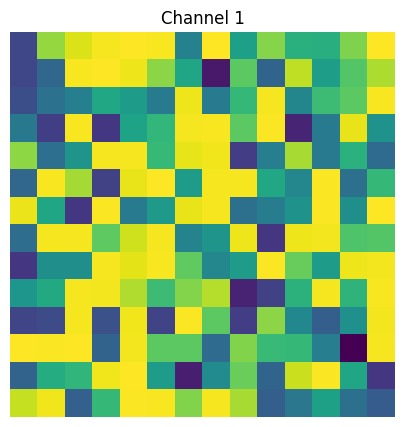

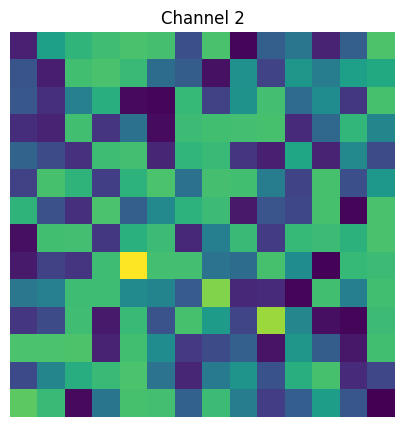

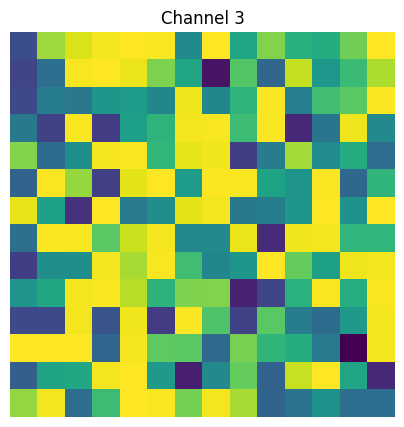

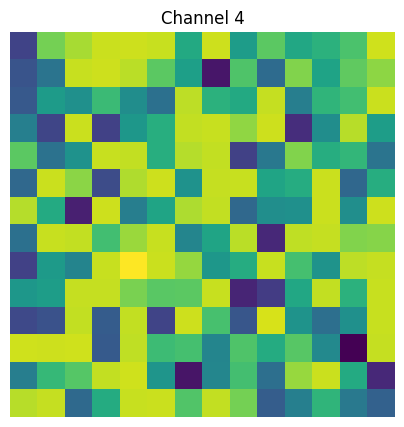

In [293]:
for i in range(shuffled.shape[1]):  # Iterate over each channel
    plt.figure(figsize=(5, 5))
    plt.imshow(shuffled_np[i])
    plt.title(f'Channel {i+1}')
    plt.axis('off')
    plt.show()

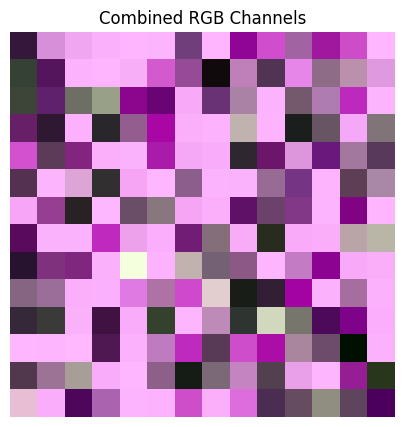

In [322]:
if preprocessed_image.shape[1] >= 3:  # Ensure there are at least 3 channels
    # Normalize the channel data to [0, 1] for visualization purposes
    norm_output = np.zeros_like(shuffled_np[:3])  # Preallocate normalized array
    for i in range(3):  # Normalize each of the first three channels
        channel = shuffled_np[i]
        norm_output[i] = (channel - np.min(channel)) / (np.max(channel) - np.min(channel))

    # Transpose the array from [C, H, W] to [H, W, C] for RGB visualization
    rgb_image = np.transpose(norm_output, (1, 2, 0))

    plt.figure(figsize=(5, 5))
    plt.imshow(rgb_image)
    plt.title('Combined RGB Channels')
    plt.axis('off')
    plt.show()


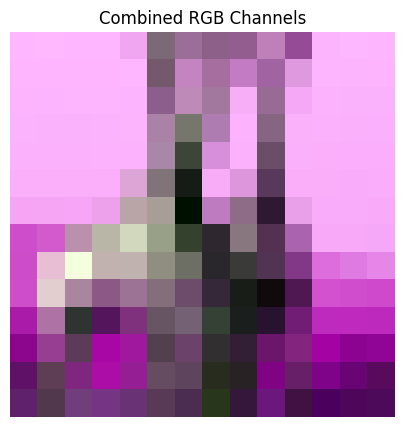

In [295]:
if pooled_output.shape[1] >= 3:  # Ensure there are at least 3 channels
    # Normalize the channel data to [0, 1] for visualization purposes
    norm_output = np.zeros_like(pooled_output_np[:3])  # Preallocate normalized array
    for i in range(3):  # Normalize each of the first three channels
        channel = pooled_output_np[i]
        norm_output[i] = (channel - np.min(channel)) / (np.max(channel) - np.min(channel))

    # Transpose the array from [C, H, W] to [H, W, C] for RGB visualization
    rgb_image = np.transpose(norm_output, (1, 2, 0))

    plt.figure(figsize=(5, 5))
    plt.imshow(rgb_image)
    plt.title('Combined RGB Channels')
    plt.axis('off')
    plt.show()

In [296]:
graph_output

tensor([[[[ 1.8562,  1.8280,  1.8517,  ...,  1.8280,  1.8517,  1.8517],
          [ 1.8421,  1.8585,  1.8517,  ...,  1.8363,  1.8517,  1.8411],
          [ 1.8446,  1.8676,  1.8517,  ...,  1.8272,  1.8517,  1.8272],
          ...,
          [-1.7218, -1.0976, -0.9534,  ..., -1.6678, -1.4794, -1.3132],
          [-1.6048, -0.8327, -0.9163,  ..., -1.2597, -1.2006, -1.2134],
          [-1.2385, -0.6114, -0.9630,  ..., -1.4976, -1.2476, -0.8435]],

         [[ 1.8102,  1.7653,  1.8076,  ...,  1.7653,  1.8076,  1.8076],
          [ 1.8319,  1.9095,  1.8076,  ...,  1.7387,  1.8076,  1.7349],
          [ 1.8044,  1.9120,  1.8076,  ...,  1.7362,  1.8076,  1.7362],
          ...,
          [-1.2516, -0.7651, -0.2698,  ..., -1.6135, -1.7487, -1.6705],
          [-1.0075, -0.7244, -0.6073,  ..., -1.4936, -1.6454, -1.8417],
          [-0.7878, -0.4933, -0.2922,  ..., -1.3262, -1.5087, -1.3897]],

         [[ 2.5062,  2.4696,  2.5221,  ...,  2.4696,  2.5221,  2.5221],
          [ 2.5272,  2.5605,  

In [407]:
from gcn_lib import DenseDilatedKnnGraph

# Initialize the DenseDilatedKnnGraph module
# Adjust the parameters as needed based on your specific requirements
dense_dilated_knn_graph = DenseDilatedKnnGraph(k=20, dilation=1, stochastic=False, epsilon=0.0)

# Assuming graph_output is your Grapher module output of shape [1, 4, 224, 224]
# Reshape or process graph_output as required to fit the expected input shape of DenseDilatedKnnGraph
# The expected shape might be [batch_size, num_dims, num_points, 1], adjust accordingly

# If you need to flatten or reshape graph_output, ensure it matches the expected dimensions
# For example, if we flatten the spatial dimensions into a single dimension of points:
num_points = pooled_output.shape[2] * pooled_output.shape[3]  # For a 224x224 image, this would be 50176
pooled_output_reshaped = pooled_output.reshape(1, 4, num_points, 1)  # Reshape to [1, 4, 50176, 1]

# Use the module to find edges
edge_index = dense_dilated_knn_graph(pooled_output_reshaped)

# edge_index now contains the indices of edges based on dilated KNN
edge_index.shape

torch.Size([2, 1, 196, 20])

In [408]:
import torch

# Let's say your edge_index is a tensor of shape [2, 1, N, k]
# where N is the number of nodes, and k is the number of nearest neighbors
k=9
# Flatten the edge_index to work with it more easily
edge_index_flat = edge_index.view(2, -1)  # This will have shape [2, N*k]

# Now, let's create an adjacency matrix of size [N, N]
# We initialize it to zeros, assuming no connections
edge_index_flat.shape

torch.Size([2, 3920])

In [409]:
N = edge_index_flat.shape[1] // k  # total number of nodes
print(N)
adjacency_matrix = torch.zeros((N, N))


435


In [410]:

# Fill the adjacency matrix
for i in range(edge_index_flat.shape[1]):
    source_node = edge_index_flat[0, i]
    target_node = edge_index_flat[1, i]

    # As edge_index contains indices starting from 0 to N-1
    adjacency_matrix[source_node, target_node] = 1

# If you want an edge list instead, you can simply use the edge_index_flat
edge_list = edge_index_flat.t().tolist()  # Convert to a list of tuples

# adjacency_matrix is your adjacency matrix, and edge_list is your list of edges


In [411]:
pooled_output_edge = edge_list
pooled_output_edge

[[0, 0],
 [84, 0],
 [14, 0],
 [70, 0],
 [13, 0],
 [44, 0],
 [29, 0],
 [28, 0],
 [43, 0],
 [42, 0],
 [57, 0],
 [87, 0],
 [56, 0],
 [71, 0],
 [184, 0],
 [15, 0],
 [30, 0],
 [181, 0],
 [31, 0],
 [167, 0],
 [1, 1],
 [39, 1],
 [180, 1],
 [183, 1],
 [27, 1],
 [26, 1],
 [50, 1],
 [37, 1],
 [38, 1],
 [112, 1],
 [12, 1],
 [153, 1],
 [110, 1],
 [126, 1],
 [40, 1],
 [9, 1],
 [194, 1],
 [64, 1],
 [193, 1],
 [142, 1],
 [2, 2],
 [90, 2],
 [89, 2],
 [76, 2],
 [16, 2],
 [52, 2],
 [77, 2],
 [87, 2],
 [56, 2],
 [85, 2],
 [51, 2],
 [28, 2],
 [170, 2],
 [78, 2],
 [57, 2],
 [73, 2],
 [184, 2],
 [15, 2],
 [88, 2],
 [58, 2],
 [3, 3],
 [113, 3],
 [125, 3],
 [182, 3],
 [111, 3],
 [152, 3],
 [154, 3],
 [189, 3],
 [185, 3],
 [190, 3],
 [191, 3],
 [166, 3],
 [176, 3],
 [175, 3],
 [177, 3],
 [178, 3],
 [129, 3],
 [161, 3],
 [168, 3],
 [162, 3],
 [4, 4],
 [173, 4],
 [174, 4],
 [172, 4],
 [160, 4],
 [129, 4],
 [171, 4],
 [159, 4],
 [158, 4],
 [146, 4],
 [168, 4],
 [157, 4],
 [143, 4],
 [5, 4],
 [145, 4],
 [144, 4],


In [ ]:
'''
[0, 0],
 [84, 0],
 [14, 0],
 [70, 0],
 [13, 0],
 [44, 0],
 [29, 0],
 [28, 0],
 [43, 0],
 [42, 0],
 [57, 0],
 [87, 0],
 [56, 0],
 [71, 0],
 [184, 0],
 [15, 0],
 [30, 0],
 [181, 0],
 [31, 0],
 [167, 0],
 [1, 1],
 [39, 1],
 [180, 1],
 [183, 1],
 [27, 1],
 [26, 1],
 [50, 1],
 [37, 1],
 [38, 1],
 [112, 1],
 [12, 1],
 [153, 1],
 [110, 1],
 [126, 1],
 [40, 1],
 [9, 1],
 [194, 1],
 [64, 1],
 [193, 1],
 [142, 1],
 [2, 2],
 [90, 2],
 [89, 2],
 [76, 2],
 [16, 2],
 [52, 2],
 [77, 2],
 [87, 2],
 [56, 2],
 [85, 2],
 [51, 2],
 [28, 2],
 [170, 2],
 [78, 2],
 [57, 2],
 [73, 2],
 [184, 2],
 [15, 2],
 [88, 2],
 [58, 2],
 [3, 3],
 [113, 3],
 [125, 3],
 [182, 3],
 [111, 3],
 [152, 3],
 [154, 3],
 [189, 3],
 [185, 3],
 [190, 3],
 [191, 3],
 [166, 3],
 [176, 3],
 [175, 3],
 [177, 3],
 [178, 3],
 [129, 3],
 [161, 3],
 [168, 3],
 [162, 3],
 [4, 4],
 [173, 4],
 [174, 4],
 [172, 4],
 [160, 4],
 [129, 4],
 [171, 4],
 [159, 4],
 [158, 4],
 [146, 4],
 [168, 4],
 [157, 4],
 [143, 4],
 [5, 4],
 [145, 4],
 [144, 4],
 [131, 4],
 [130, 4],
 [132, 4],
 [178, 4],
 [5, 5],
 [143, 5],
 [4, 5],
 [127, 5],
 [129, 5],
 [145, 5],
 [172, 5],
 [168, 5],
 [171, 5],
 [173, 5],
 [146, 5],
 [174, 5],
 [160, 5],
 [185, 5],
 [141, 5],
 [159, 5],
 [155, 5],
 [157, 5],
 [158, 5],
 [130, 5],
 [6, 6],
 [188, 6],
 [186, 6],
 [187, 6],
 [123, 6],
 [122, 6],
 [108, 6],
 [102, 6],
 [127, 6],
 [5, 6],
 [137, 6],
 [192, 6],
 [185, 6],
 [104, 6],
 [103, 6],
 [154, 6],
 [143, 6],
 [121, 6],
 [109, 6],
 [141, 6],
 [7, 7],
 [21, 7],
 [35, 7],
 [34, 7],
 [33, 7],
 [32, 7],
 [8, 7],
 [128, 7],
 [47, 7],
 [46, 7],
 [48, 7],
 [98, 7],
 [18, 7],
 [114, 7],
 [110, 7],
 [101, 7],
 [142, 7],
 [124, 7],
 [17, 7],
 [49, 7],
 [8, 8],
 [32, 8],
 [33, 8],
 [128, 8],
 [34, 8],
 [21, 8],
 [7, 8],
 [35, 8],
 [18, 8],
 [98, 8],
 [47, 8],
 [46, 8],
 [114, 8],
 [48, 8],
 [110, 8],
 [142, 8],
 [19, 8],
 [111, 8],
 [101, 8],
 [166, 8],
 [9, 9],
 [193, 9],
 [126, 9],
 [194, 9],
 [37, 9],
 [12, 9],
 [24, 9],
 [112, 9],
 [25, 9],
 [10, 9],
 [153, 9],
 [26, 9],
 [100, 9],
 [50, 9],
 [39, 9],
 [1, 9],
 [22, 9],
 [11, 9],
 [180, 9],
 [183, 9],
 [10, 10],
 [25, 10],
 [24, 10],
 [193, 10],
 [194, 10],
 [11, 10],
 [9, 10],
 [12, 10],
 [100, 10],
 [36, 10],
 [22, 10],
 [37, 10],
 [26, 10],
 [126, 10],
 [23, 10],
 [153, 10],
 [112, 10],
 [39, 10],
 [1, 10],
 [50, 10],
 [11, 11],
 [36, 11],
 [25, 11],
 [10, 11],
 [23, 11],
 [24, 11],
 [22, 11],
 [193, 11],
 [100, 11],
 [194, 11],
 [9, 11],
 [12, 11],
 [109, 11],
 [126, 11],
 [37, 11],
 [179, 11],
 [26, 11],
 [139, 11],
 [6, 11],
 [153, 11],
 [12, 12],
 [194, 12],
 [26, 12],
 [193, 12],
 [37, 12],
 [9, 12],
 [24, 12],
 [10, 12],
 [153, 12],
 [25, 12],
 [126, 12],
 [1, 12],
 [39, 12],
 [112, 12],
 [180, 12],
 [50, 12],
 [183, 12],
 [27, 12],
 [11, 12],
 [100, 12],
 '''

In [336]:
# shuff_edge_list = edge_list
shuff_edge_list

[[0, 0],
 [112, 0],
 [43, 0],
 [135, 0],
 [191, 0],
 [143, 0],
 [140, 0],
 [21, 0],
 [64, 0],
 [1, 1],
 [66, 1],
 [27, 1],
 [178, 1],
 [102, 1],
 [62, 1],
 [74, 1],
 [84, 1],
 [90, 1],
 [2, 2],
 [63, 2],
 [144, 2],
 [183, 2],
 [108, 2],
 [34, 2],
 [106, 2],
 [124, 2],
 [62, 2],
 [3, 3],
 [44, 3],
 [115, 3],
 [59, 3],
 [142, 3],
 [18, 3],
 [117, 3],
 [128, 3],
 [139, 3],
 [97, 4],
 [4, 4],
 [17, 4],
 [7, 4],
 [172, 4],
 [146, 4],
 [81, 4],
 [75, 4],
 [41, 4],
 [5, 5],
 [186, 5],
 [179, 5],
 [95, 5],
 [121, 5],
 [100, 5],
 [71, 5],
 [77, 5],
 [37, 5],
 [6, 6],
 [35, 6],
 [80, 6],
 [29, 6],
 [113, 6],
 [67, 6],
 [93, 6],
 [94, 6],
 [165, 6],
 [7, 7],
 [146, 7],
 [97, 7],
 [4, 7],
 [17, 7],
 [81, 7],
 [172, 7],
 [41, 7],
 [95, 7],
 [8, 8],
 [123, 8],
 [32, 8],
 [180, 8],
 [152, 8],
 [136, 8],
 [11, 8],
 [96, 8],
 [47, 8],
 [9, 9],
 [162, 9],
 [188, 9],
 [12, 9],
 [56, 9],
 [132, 9],
 [19, 9],
 [190, 9],
 [185, 9],
 [10, 10],
 [131, 10],
 [138, 10],
 [185, 10],
 [68, 10],
 [127, 10],
 [39, 

In [314]:
with open('output.txt', 'w') as f:
    # Use the print function with the file argument to write to the file
    print(edge_list, file=f)

In [315]:
len(edge_list)

1764

In [316]:
# Reshape the feature tensor to match the number of nodes
# Assuming each pixel is a node, and we're flattening the spatial dimensions
num_nodes = 14*14
feature_dimension = 4
graph_features = pooled_output.reshape(1, feature_dimension, num_nodes)

# Now, 'graph_features' is of shape [1, 4, 50176]
# If you need to remove the batch dimension and just work with features, you could do:
graph_features = graph_features.squeeze(0)  # This is now of shape [4, 50176]

# If you need to map these features to each node based on your edge list
node_features = {node: [] for node in range(num_nodes)}  # Dictionary to store features for each node

# Assuming 'edge_list' is a list of tuples (target_node_index, source_node_index)
for target_node, source_node in edge_list:
    # Add the source node features to the target node's feature list
    node_features[target_node].append(graph_features[:, source_node])

# Now 'node_features' contains a mapping of each node to its connected nodes' features
# You can process this dictionary as per your GNN's requirements


In [317]:
node_features

{0: [tensor([1.8423, 1.7858, 2.5021, 1.8645], grad_fn=<SelectBackward0>),
  tensor([1.8495, 1.8009, 2.5078, 1.8634], grad_fn=<SelectBackward0>),
  tensor([1.8492, 1.7989, 2.5064, 1.8592], grad_fn=<SelectBackward0>),
  tensor([1.8494, 1.8031, 2.5130, 1.8617], grad_fn=<SelectBackward0>),
  tensor([1.8062, 1.7583, 2.4691, 1.8397], grad_fn=<SelectBackward0>),
  tensor([1.8162, 1.7963, 2.5071, 1.8505], grad_fn=<SelectBackward0>),
  tensor([1.8238, 1.7891, 2.4999, 1.8512], grad_fn=<SelectBackward0>),
  tensor([1.8318, 1.7653, 2.4901, 1.8547], grad_fn=<SelectBackward0>),
  tensor([1.8356, 1.7711, 2.4976, 1.8545], grad_fn=<SelectBackward0>),
  tensor([1.8368, 1.7722, 2.4953, 1.8515], grad_fn=<SelectBackward0>),
  tensor([1.8366, 1.7720, 2.4992, 1.8554], grad_fn=<SelectBackward0>),
  tensor([1.8344, 1.7819, 2.4937, 1.8488], grad_fn=<SelectBackward0>),
  tensor([1.8275, 1.7552, 2.4807, 1.8509], grad_fn=<SelectBackward0>),
  tensor([1.2204, 1.4347, 1.5317, 1.5485], grad_fn=<SelectBackward0>)],
 1

In [404]:
edge_list

[[0, 0],
 [84, 0],
 [14, 0],
 [70, 0],
 [13, 0],
 [44, 0],
 [29, 0],
 [28, 0],
 [43, 0],
 [42, 0],
 [57, 0],
 [87, 0],
 [56, 0],
 [71, 0],
 [184, 0],
 [15, 0],
 [30, 0],
 [181, 0],
 [31, 0],
 [167, 0],
 [1, 1],
 [39, 1],
 [180, 1],
 [183, 1],
 [27, 1],
 [26, 1],
 [50, 1],
 [37, 1],
 [38, 1],
 [112, 1],
 [12, 1],
 [153, 1],
 [110, 1],
 [126, 1],
 [40, 1],
 [9, 1],
 [194, 1],
 [64, 1],
 [193, 1],
 [142, 1],
 [2, 2],
 [90, 2],
 [89, 2],
 [76, 2],
 [16, 2],
 [52, 2],
 [77, 2],
 [87, 2],
 [56, 2],
 [85, 2],
 [51, 2],
 [28, 2],
 [170, 2],
 [78, 2],
 [57, 2],
 [73, 2],
 [184, 2],
 [15, 2],
 [88, 2],
 [58, 2],
 [3, 3],
 [113, 3],
 [125, 3],
 [182, 3],
 [111, 3],
 [152, 3],
 [154, 3],
 [189, 3],
 [185, 3],
 [190, 3],
 [191, 3],
 [166, 3],
 [176, 3],
 [175, 3],
 [177, 3],
 [178, 3],
 [129, 3],
 [161, 3],
 [168, 3],
 [162, 3],
 [4, 4],
 [173, 4],
 [174, 4],
 [172, 4],
 [160, 4],
 [129, 4],
 [171, 4],
 [159, 4],
 [158, 4],
 [146, 4],
 [168, 4],
 [157, 4],
 [143, 4],
 [5, 4],
 [145, 4],
 [144, 4],


0 0
0 0
0 6
0 0
0 1
0 0
0 5
0 0
13 0
0 0
2 3
0 0
1 2
0 0
0 2
0 0
1 3
0 0
0 3
0 0
1 4
0 0
3 6
0 0
0 4
0 0
1 5
0 0
2 13
0 0
1 1
0 0
2 2
0 0
13 12
0 0
3 2
0 0
13 11
0 0


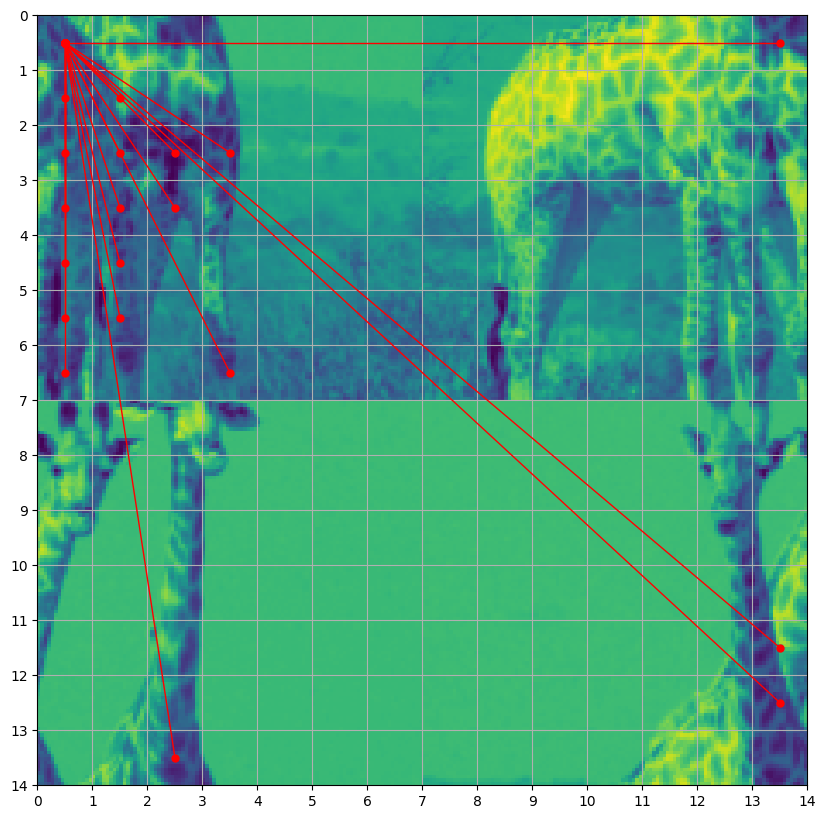

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming preprocessed_image is defined. Replace the next line with actual image loading if necessary.
image_array = permuted_images_tensors[0][0][0]  # Placeholder for the actual image

grid_size = 15  # Grid size for the 14x14 grid

# Example edge cases
edge_nine = [[0, 0],
[84, 0],
[14, 0],
[70, 0],
[13, 0],
[44, 0],
[29, 0],
[28, 0],
[43, 0],
[42, 0],
[57, 0],
[87, 0],
[56, 0],
[71, 0],
[184, 0],
[15, 0],
[30, 0],
[181, 0],
[31, 0],
[167, 0]]

# edge_nine = [[0,29],[0,15],[0,44],[0,59]]

# Display the image as a background
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image_array, extent=[0, grid_size-1, grid_size-1, 0])

# Setting axis limits and aspect ratio
ax.set_xlim([0, grid_size-1])
ax.set_ylim([0, grid_size-1])
ax.set_aspect('equal')
# Inverting y-axis to have (0,0) at top-left
ax.set_ylim(ax.get_ylim()[::-1])

# Setting ticks for a clearer grid representation
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))

# Predefined values that require adjustment
# adjust_values = [14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194]

# Overlay the connections on top of the image
for conn in edge_nine:

    x1, y1 = ((conn[0]) % 14, (conn[0]) // 14)
    x2, y2 = ((conn[1]) % 14, (conn[1]) // 14)

    print(x1,y1)
    print(x2,y2)
    
    # Check if adjustments are needed for x1 and x2
    # if conn[0] in adjust_values:
    #     x1_adjust = x1 - 0.5
    # else:
    x1_adjust = x1 + 0.5
        
    # if conn[1] in adjust_values:
    #     x2_adjust = x2 - 0.5
    # else:
    x2_adjust = x2 + 0.5
    
    plt.plot([x1_adjust, x2_adjust], [y1 + 0.5, y2 + 0.5], marker='o', markersize=5, linestyle='-', color='red', linewidth=1)

plt.grid(True)
plt.show()


3 1
1 1
1 1
1 1
2 1
1 1
0 1
1 1
11 1
1 1
0 0
1 1
0 2
1 1
4 1
1 1
11 0
1 1


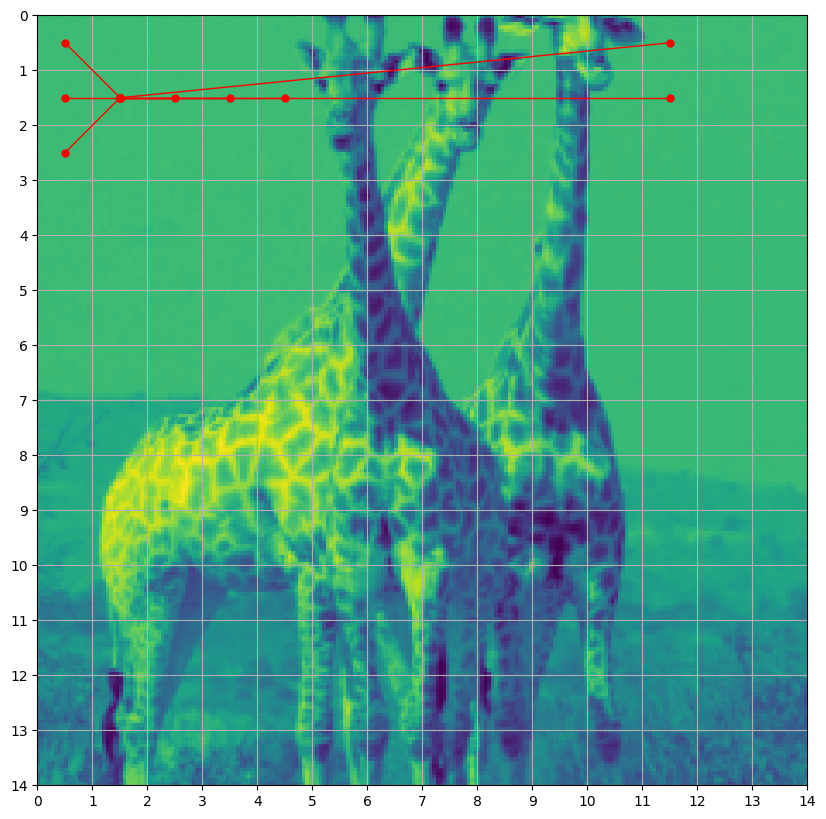

In [321]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming preprocessed_image is defined. Replace the next line with actual image loading if necessary.
image_array = preprocessed_image[0][0]  # Placeholder for the actual image

grid_size = 15  # Grid size for the 14x14 grid

# Example edge cases
edge_nine = [[17, 15],
 [15, 15],
 [16, 15],
 [14, 15],
 [25, 15],
 [0, 15],
 [28, 15],
 [18, 15],
 [11, 15]]

# edge_nine = [[0,29],[0,15],[0,44],[0,59]]

# Display the image as a background
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image_array, extent=[0, grid_size-1, grid_size-1, 0])

# Setting axis limits and aspect ratio
ax.set_xlim([0, grid_size-1])
ax.set_ylim([0, grid_size-1])
ax.set_aspect('equal')
# Inverting y-axis to have (0,0) at top-left
ax.set_ylim(ax.get_ylim()[::-1])

# Setting ticks for a clearer grid representation
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))

# Predefined values that require adjustment
# adjust_values = [14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194]

# Overlay the connections on top of the image
for conn in edge_nine:

    x1, y1 = ((conn[0]) % 14, (conn[0]) // 14)
    x2, y2 = ((conn[1]) % 14, (conn[1]) // 14)

    print(x1,y1)
    print(x2,y2)
    
    # Check if adjustments are needed for x1 and x2
    # if conn[0] in adjust_values:
    #     x1_adjust = x1 - 0.5
    # else:
    x1_adjust = x1 + 0.5
        
    # if conn[1] in adjust_values:
    #     x2_adjust = x2 - 0.5
    # else:
    x2_adjust = x2 + 0.5
    
    plt.plot([x1_adjust, x2_adjust], [y1 + 0.5, y2 + 0.5], marker='o', markersize=5, linestyle='-', color='red', linewidth=1)

plt.grid(True)
plt.show()


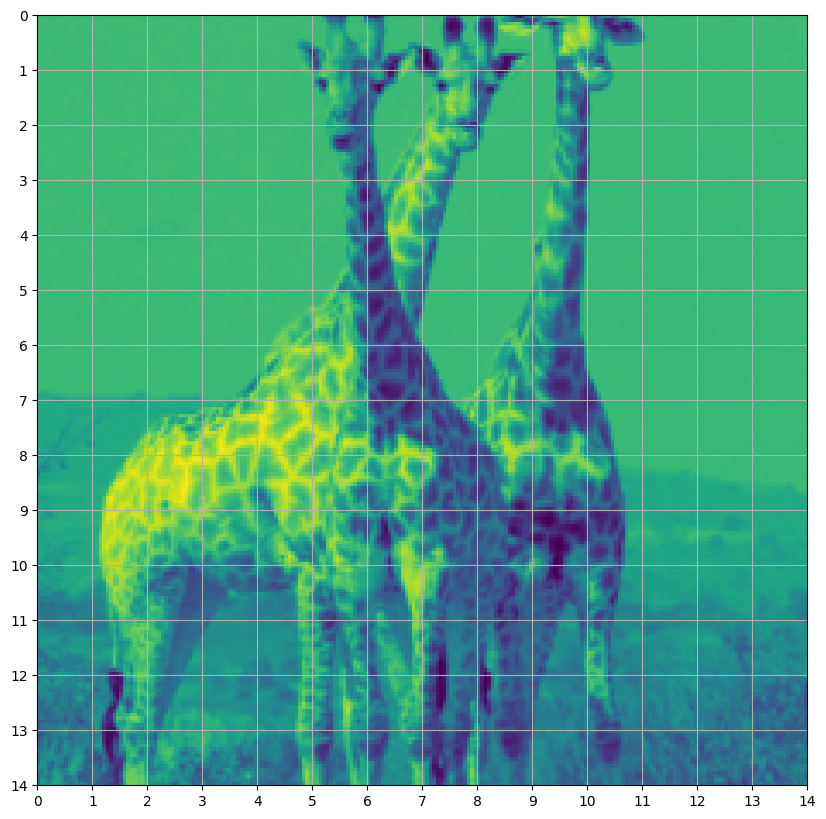

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming preprocessed_image is defined. Replace the next line with actual image loading if necessary.
image_array = preprocessed_image[0][0]  # Placeholder for the actual image

grid_size = 15  # Grid size for the 14x14 grid

# Example edge cases
edge_nine = [[17, 15],
 [15, 15],
 [16, 15],
 [14, 15],
 [25, 15],
 [0, 15],
 [28, 15],
 [18, 15],
 [11, 15]]

# edge_nine = [[0,29],[0,15],[0,44],[0,59]]

# Display the image as a background
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image_array, extent=[0, grid_size-1, grid_size-1, 0])

# Setting axis limits and aspect ratio
ax.set_xlim([0, grid_size-1])
ax.set_ylim([0, grid_size-1])
ax.set_aspect('equal')
# Inverting y-axis to have (0,0) at top-left
ax.set_ylim(ax.get_ylim()[::-1])

# Setting ticks for a clearer grid representation
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))

# Predefined values that require adjustment
# adjust_values = [14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194]

# Overlay the connections on top of the image
# for conn in edge_nine:

#     x1, y1 = ((conn[0]) % 14, (conn[0]) // 14)
#     x2, y2 = ((conn[1]) % 14, (conn[1]) // 14)

#     print(x1,y1)
#     print(x2,y2)
    
#     # Check if adjustments are needed for x1 and x2
#     # if conn[0] in adjust_values:
#     #     x1_adjust = x1 - 0.5
#     # else:
#     x1_adjust = x1 + 0.5
        
#     # if conn[1] in adjust_values:
#     #     x2_adjust = x2 - 0.5
#     # else:
#     x2_adjust = x2 + 0.5
    
#     plt.plot([x1_adjust, x2_adjust], [y1 + 0.5, y2 + 0.5], marker='o', markersize=5, linestyle='-', color='red', linewidth=1)

plt.grid(True)
plt.show()


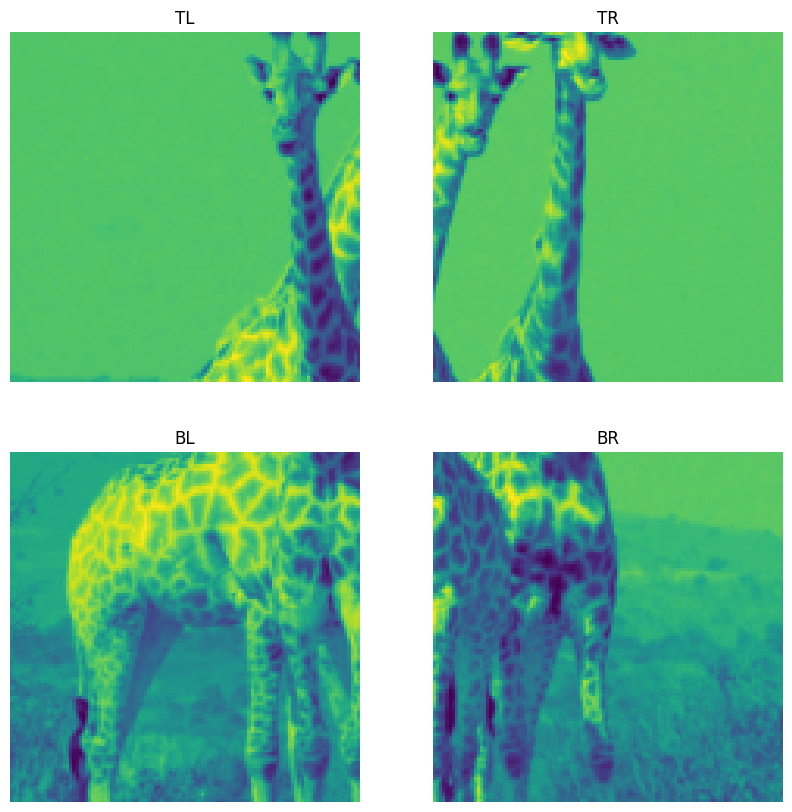

In [358]:


# def make_square(image_path, output_size=(300, 300)):
#     """
#     Open an image file and convert it into a square image of the specified size.
#     """
#     with Image.open(image_path) as img:
#         # Resize image maintaining aspect ratio
#         img.thumbnail(output_size, Image.Resampling.LANCZOS)
        
#         # Create a new square background image
#         square_img = Image.new("RGB", output_size, (32, 32, 32))
#         # Calculate coordinates to paste the input image onto the center of the background
#         x = (output_size[0] - img.size[0]) // 2
#         y = (output_size[1] - img.size[1]) // 2
#         square_img.paste(img, (x, y))
#         return square_img

# def cut_into_tiles(image, num_tiles=9):
#     """
#     Cut the square image into num_tiles pieces (default is 9 for a 3x3 grid).
#     Returns a dictionary of Image objects representing each tile with their position as keys.
#     """
#     if num_tiles != 9:
#         raise ValueError("This function currently supports only 9 tiles.")
    
#     tiles = {}
#     width, height = image.size
#     tile_width = width // 3
#     tile_height = height // 3
    
#     # positions = ['tl', 'tc', 'tr', 'cl', 'c', 'cr', 'bl', 'bc', 'br'] # Top-Left, Top-Center, ..., Bottom-Right
    
#     for i in range(3):  # For each row
#         for j in range(3):  # For each column
#             left = j * tile_width
#             upper = i * tile_height
#             right = left + tile_width
#             lower = upper + tile_height
#             tile = image.crop((left, upper, right, lower))
#             tiles[positions.pop(0)] = tile
#     return tiles


